#**Import Libraries**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
import warnings 
warnings.simplefilter('ignore')

#**Load Dataset**

In [75]:
df=pd.read_csv('Data/glass.csv')
df.columns=['Id','Ri', 'Na', 'Mg', 'Al', 'Si' ,'K' ,'Ca', 'Ba', 'Fe', 'Type']
df.loc[df['Type']==1,'Type']='building_windows_float_processed'
df.loc[df['Type']==2,'Type']='building_windows_non_float_processed'
df.loc[df['Type']==3,'Type']='vehicle_windows_float_processed'
df.loc[df['Type']==4,'Type']='vehicle_windows_non_float_processed'
df.loc[df['Type']==5,'Type']='containers'
df.loc[df['Type']==6,'Type']='tableware'
df.loc[df['Type']==7,'Type']='headlamps'
df=pd.DataFrame(df)
print(df.head())

   Id       Ri     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

                               Type  
0  building_windows_float_processed  
1  building_windows_float_processed  
2  building_windows_float_processed  
3  building_windows_float_processed  
4  building_windows_float_processed  


#**Data Cleaning** 

In [76]:
print(df.isnull().sum())

Id      0
Ri      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   Ri      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB
None


In [78]:
x=df.drop(['Id','Type'],axis=1)
y=df['Type']
x.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


#**Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3097959a60>,
      dtype=object)

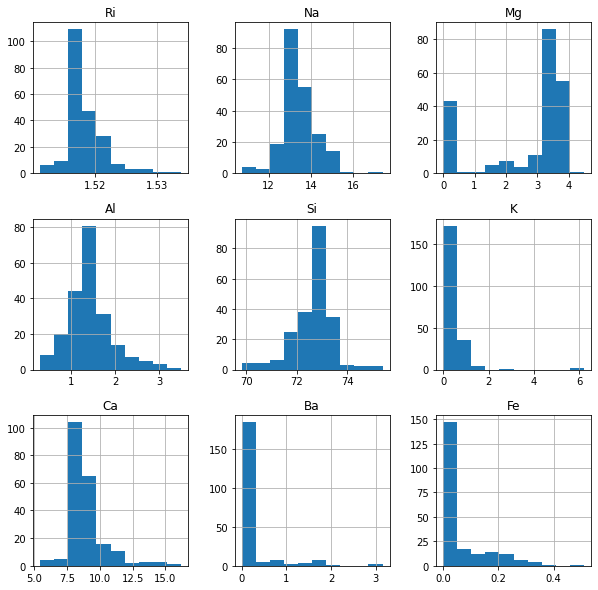

In [79]:
x.hist(figsize=(10,10))

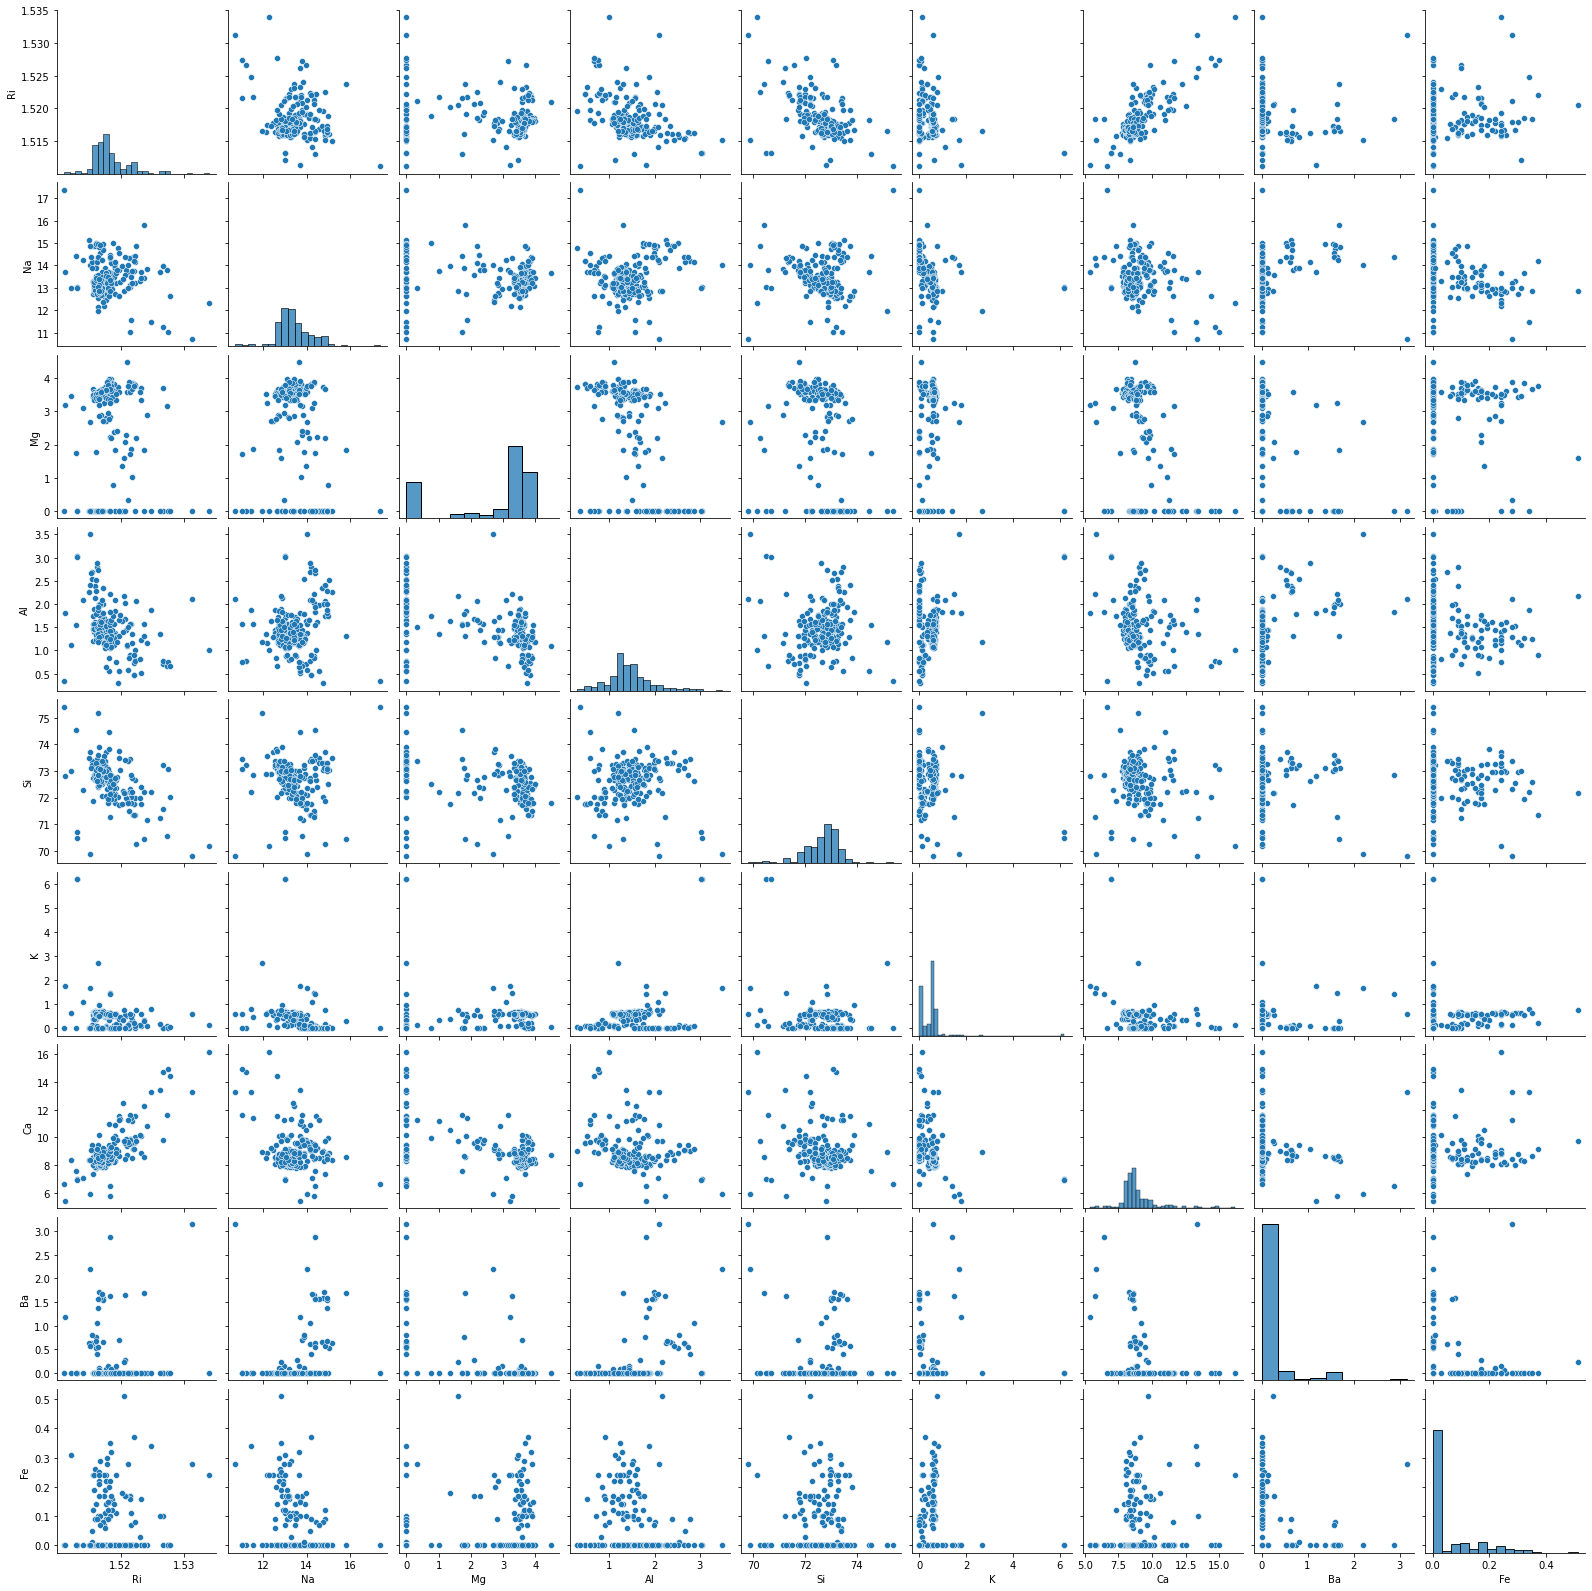

In [80]:
sns.pairplot(x)

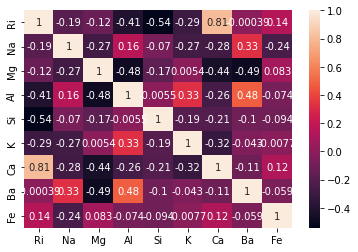

In [81]:
sns.heatmap(x.corr(),annot=True,)

#**Load Train and Test Data & Data Cleaning**

In [82]:
df_train=pd.read_csv('Data/trainKNN.txt',sep=',')
df_train.columns=['Id','Ri', 'Na', 'Mg', 'Al', 'Si' ,'K' ,'Ca', 'Ba', 'Fe', 'Type']
df_train

df_test=pd.read_csv('Data/testKNN.txt',sep=',')
df_test.columns=['Id','Ri', 'Na', 'Mg', 'Al', 'Si' ,'K' ,'Ca', 'Ba', 'Fe', 'Type']
df_test


df_train[['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]=df_train[['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].replace(0,np.nan)
df_test[['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]=df_test[['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].replace(0,np.nan)

print(df_train.head(3),'\n')
print(df_test.head(3))

   Id       Ri     Na    Mg    Al     Si     K    Ca  Ba  Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75 NaN NaN     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83 NaN NaN     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78 NaN NaN     1 

   Id       Ri     Na    Mg    Al     Si     K     Ca  Ba    Fe  Type
0  68  1.52152  13.05  3.65  0.87  72.32  0.19   9.85 NaN  0.17     1
1  69  1.52152  13.12  3.58  0.90  72.20  0.23   9.82 NaN  0.16     1
2  70  1.52300  13.31  3.58  0.82  71.99  0.12  10.17 NaN  0.03     1


#**Data Imputation**

In [83]:
x_train=df_train.drop(['Id','Type'],axis=1)
x_test=df_test.drop(['Id','Type'],axis=1)
y_train=df_train['Type']
y_test=df_test['Type']

Ri_mean=x_train.loc[:,'Ri'].mean()
Na_Mean=x_train.loc[:,'Na'].mean()
Mg_mean=x_train.loc[:,'Mg'].mean()
Al_mean=x_train.loc[:,'Al'].mean()
Si_mean=x_train.loc[:,'Si'].mean()
K_median=x_train.loc[:,'K'].median()
Ca_median=x_train.loc[:,'Ca'].median()
Ba_median=x_train.loc[:,'Ba'].median()
Fe_median=x_train.loc[:,'Fe'].median()

'''K_mean=x_train.loc[:,'K'].mean()
Ca_mean=x_train.loc[:,'Ca'].mean()
Ba_mean=x_train.loc[:,'Ba'].mean()
Fe_mean=x_train.loc[:,'Fe'].mean()'''


x_train.loc[:,'Ri']=x_train.loc[:,'Ri'].fillna(Ri_mean)
x_train.loc[:,'Na']=x_train.loc[:,'Na'].fillna(Na_Mean)
x_train.loc[:,'Mg']=x_train.loc[:,'Mg'].fillna(Mg_mean)
x_train.loc[:,'Al']=x_train.loc[:,'Al'].fillna(Al_mean)
x_train.loc[:,'Si']=x_train.loc[:,'Si'].fillna(Si_mean)
x_train.loc[:,'K']=x_train.loc[:,'K'].fillna(K_median)
x_train.loc[:,'Ca']=x_train.loc[:,'Ca'].fillna(Ca_median)
x_train.loc[:,'Ba']=x_train.loc[:,'Ba'].fillna(Ba_median)
x_train.loc[:,'Fe']=x_train.loc[:,'Fe'].fillna(Fe_median)


x_test.loc[:,'Ri']=x_test.loc[:,'Ri'].fillna(Ri_mean)
x_test.loc[:,'Na']=x_test.loc[:,'Na'].fillna(Na_Mean)
x_test.loc[:,'Mg']=x_test.loc[:,'Mg'].fillna(Mg_mean)
x_test.loc[:,'Al']=x_test.loc[:,'Al'].fillna(Al_mean)
x_test.loc[:,'Si']=x_test.loc[:,'Si'].fillna(Si_mean)
x_test.loc[:,'K']=x_test.loc[:,'K'].fillna(K_median)
x_test.loc[:,'Ca']=x_test.loc[:,'Ca'].fillna(Ca_median)
x_test.loc[:,'Ba']=x_test.loc[:,'Ba'].fillna(Ba_median)
x_test.loc[:,'Fe']=x_test.loc[:,'Fe'].fillna(Fe_median)

print(x_train.head(3),'\n')
print(x_test.head(3))

        Ri     Na    Mg    Al     Si     K    Ca    Ba    Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.67  0.15
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.67  0.15
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.67  0.15 

        Ri     Na    Mg    Al     Si     K     Ca    Ba    Fe
0  1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.67  0.17
1  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.67  0.16
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.67  0.03


#**Standardizer**

In [84]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


#**Bulid Model**
#**Euclidean Distance Metric**

In [85]:
knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print('accuracy_score : ',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

print('Note : \n Type of glass: (class attribute)\n ~~~~~~~~~~~~~~\n 1 building_windows_float_processed\n 2 building_windows_non_float_processed\n 3 vehicle_windows_float_processed\n 4 vehicle_windows_non_float_processed (none in this database)\n 5 containers\n 6 tableware\n 7 headlamps')

accuracy_score :  0.4444444444444444

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         3
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       0.60      1.00      0.75         3

    accuracy                           0.44        18
   macro avg       0.38      0.44      0.35        18
weighted avg       0.38      0.44      0.35        18

Note : 
 Type of glass: (class attribute)
 ~~~~~~~~~~~~~~
 1 building_windows_float_processed
 2 building_windows_non_float_processed
 3 vehicle_windows_float_processed
 4 vehicle_windows_non_float_processed (none in this database)
 5 containers
 6 tableware
 7 headlamps


# **Manhattan Distance Metric**

In [86]:
knn1=KNeighborsClassifier(n_neighbors=6,metric='manhattan')
knn1.fit(x_train,y_train)
y_pred=knn1.predict(x_test)

print('accuracy_score : ',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

print('Note : \n Type of glass: (class attribute)\n ~~~~~~~~~~~~~~\n 1 building_windows_float_processed\n 2 building_windows_non_float_processed\n 3 vehicle_windows_float_processed\n 4 vehicle_windows_non_float_processed (none in this database)\n 5 containers\n 6 tableware\n 7 headlamps')

accuracy_score :  0.5555555555555556

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.50      0.67      0.57         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         3
           7       0.60      1.00      0.75         3

    accuracy                           0.56        18
   macro avg       0.42      0.56      0.45        18
weighted avg       0.42      0.56      0.45        18

Note : 
 Type of glass: (class attribute)
 ~~~~~~~~~~~~~~
 1 building_windows_float_processed
 2 building_windows_non_float_processed
 3 vehicle_windows_float_processed
 4 vehicle_windows_non_float_processed (none in this database)
 5 containers
 6 tableware
 7 headlamps
